In [61]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [63]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [64]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [65]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [66]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [67]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8423b9b0b4540d4bc80ba07376fa3bb


In [68]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [69]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | kaeo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | normandin
Processing Record 5 of Set 1 | lugus
Processing Record 6 of Set 1 | yongan
Processing Record 7 of Set 1 | samarai
Processing Record 8 of Set 1 | paamiut
Processing Record 9 of Set 1 | comarapa
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | cloquet
Processing Record 12 of Set 1 | barentu
Processing Record 13 of Set 1 | hede
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bunia
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | poum
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proc

Processing Record 40 of Set 4 | bayan
Processing Record 41 of Set 4 | natal
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | loviisa
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | luanda
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | ponta delgada
Processing Record 1 of Set 5 | qasigiannguit
Processing Record 2 of Set 5 | indiaroba
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | nambutalai
Processing Record 6 of Set 5 | castro
Processing Record 7 of Set 5 | saint-louis
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | axim
Processing Record 10 of Set 5 | saint-francois
Processing Record 11 of Set 5 | magdalena
Processing Record 12 of Set 5 | kaitangata

Processing Record 30 of Set 8 | utica
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | chuy
Processing Record 33 of Set 8 | lagoa
Processing Record 34 of Set 8 | bundaberg
Processing Record 35 of Set 8 | alzamay
Processing Record 36 of Set 8 | ballina
Processing Record 37 of Set 8 | vaitape
Processing Record 38 of Set 8 | barbar
City not found. Skipping...
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | narasannapeta
Processing Record 41 of Set 8 | bonavista
Processing Record 42 of Set 8 | port shepstone
Processing Record 43 of Set 8 | belmopan
Processing Record 44 of Set 8 | manzhouli
Processing Record 45 of Set 8 | witu
Processing Record 46 of Set 8 | beloha
Processing Record 47 of Set 8 | hasaki
Processing Record 48 of Set 8 | portree
Processing Record 49 of Set 8 | am timan
Processing Record 50 of Set 8 | kyra
Processing Record 1 of Set 9 | vila franca do campo
Processing Record 2 of Set 9 | cayenne
Processin

Processing Record 20 of Set 12 | tillabery
City not found. Skipping...
Processing Record 21 of Set 12 | manokwari
Processing Record 22 of Set 12 | baragua
Processing Record 23 of Set 12 | mikkeli
Processing Record 24 of Set 12 | ugoofaaru
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | finnsnes
Processing Record 27 of Set 12 | opuwo
Processing Record 28 of Set 12 | bargal
City not found. Skipping...
Processing Record 29 of Set 12 | lhokseumawe
Processing Record 30 of Set 12 | tibati
Processing Record 31 of Set 12 | esteli
Processing Record 32 of Set 12 | majene
Processing Record 33 of Set 12 | kamaishi
Processing Record 34 of Set 12 | trofors
Processing Record 35 of Set 12 | ginda
Processing Record 36 of Set 12 | kangayam
Processing Record 37 of Set 12 | santarem
Processing Record 38 of Set 12 | manzanillo
Processing Record 39 of Set 12 | manggar
Processing Record 40 of Set 12 | deniliquin
Processing Record 41 of Set 12 | kandalaksha
Processing Record 42 of Se

In [70]:
len(city_data)

586

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.8947,-156.4700,72.97,81,1,6.91,US,2021-09-20 16:40:14
1,Kaeo,-35.1000,173.7833,46.33,94,15,2.53,NZ,2021-09-20 16:39:56
2,Bredasdorp,-34.5322,20.0403,58.32,47,2,12.66,ZA,2021-09-20 16:39:05
3,Normandin,48.8333,-72.5321,71.73,40,17,10.36,CA,2021-09-20 16:42:06
4,Lugus,5.7036,120.8203,82.09,70,100,2.30,PH,2021-09-20 16:42:07
5,Yongan,39.6957,113.6871,53.49,80,42,4.27,CN,2021-09-20 16:42:07
6,Samarai,-10.6167,150.6667,77.68,89,100,13.40,PG,2021-09-20 16:38:55
7,Paamiut,61.9940,-49.6678,36.07,78,10,27.29,GL,2021-09-20 16:42:07
8,Comarapa,-17.9000,-64.4833,71.94,51,40,9.71,BO,2021-09-20 16:42:08
9,Butaritari,3.0707,172.7902,81.48,78,75,10.56,KI,2021-09-20 16:38:50


In [72]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-09-20 16:40:14,20.8947,-156.4700,72.97,81,1,6.91
1,Kaeo,NZ,2021-09-20 16:39:56,-35.1000,173.7833,46.33,94,15,2.53
2,Bredasdorp,ZA,2021-09-20 16:39:05,-34.5322,20.0403,58.32,47,2,12.66
3,Normandin,CA,2021-09-20 16:42:06,48.8333,-72.5321,71.73,40,17,10.36
4,Lugus,PH,2021-09-20 16:42:07,5.7036,120.8203,82.09,70,100,2.30
5,Yongan,CN,2021-09-20 16:42:07,39.6957,113.6871,53.49,80,42,4.27
6,Samarai,PG,2021-09-20 16:38:55,-10.6167,150.6667,77.68,89,100,13.40
7,Paamiut,GL,2021-09-20 16:42:07,61.9940,-49.6678,36.07,78,10,27.29
8,Comarapa,BO,2021-09-20 16:42:08,-17.9000,-64.4833,71.94,51,40,9.71
9,Butaritari,KI,2021-09-20 16:38:50,3.0707,172.7902,81.48,78,75,10.56


In [73]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [74]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

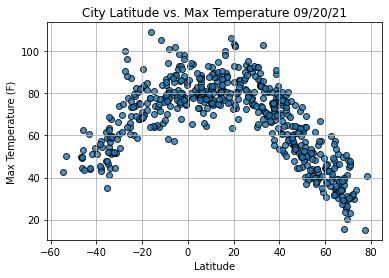

In [75]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

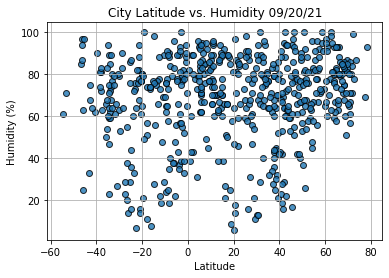

In [76]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

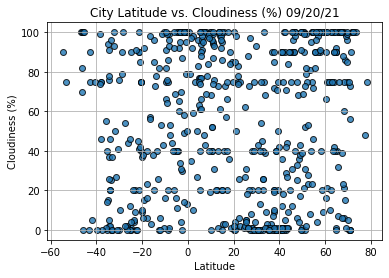

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

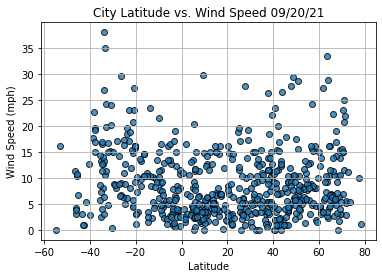

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [79]:
# plot_linear_regression

In [80]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
# Create the Hemishpere Dataframes

In [82]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2021-09-20 16:38:53
Lat                      -33.0153
Lng                       27.9116
Max Temp                    59.94
Humidity                       77
Cloudiness                      0
Wind Speed                  24.16
Name: 13, dtype: object

In [83]:
# Filtering the dataframe based on a value of a row

In [84]:
# Example (Get all Nothern Hemishperes lattitudes, for latitudes greater than or equal to 0)
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
581    False
582     True
583     True
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [85]:
# Example (Find all latitudes greater than or equal to 0)
# Use the loc method on the city_data_df Dataframe.  
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2021-09-20 16:40:14,20.8947,-156.4700,72.97,81,1,6.91
3,Normandin,CA,2021-09-20 16:42:06,48.8333,-72.5321,71.73,40,17,10.36
4,Lugus,PH,2021-09-20 16:42:07,5.7036,120.8203,82.09,70,100,2.30
5,Yongan,CN,2021-09-20 16:42:07,39.6957,113.6871,53.49,80,42,4.27
7,Paamiut,GL,2021-09-20 16:42:07,61.9940,-49.6678,36.07,78,10,27.29


In [86]:
# Return a dataframe with all data fitting the criteria

In [87]:

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [88]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Call the plot_linear_regression function with the x and y values 

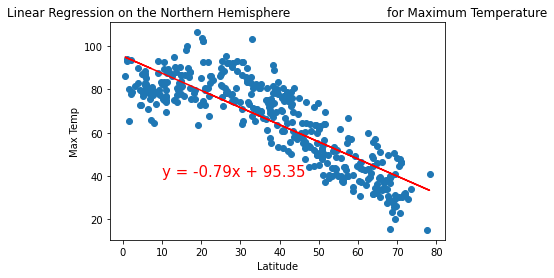

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [90]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# Call the plot_linear_regression function with the x and y values 

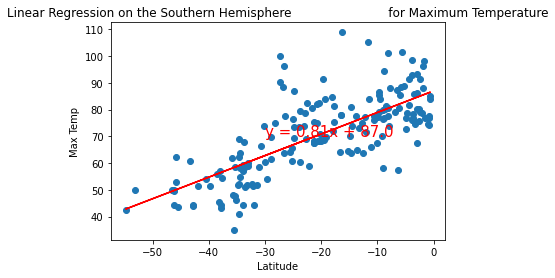

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,70))

In [92]:
# Perform Linear Regress of the Percent Humidity for the Northern Hemisphere

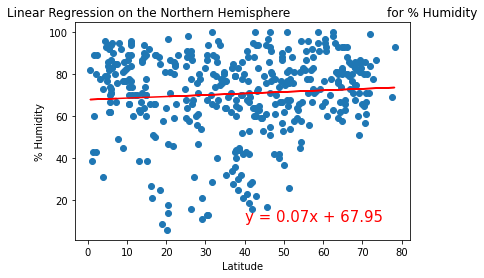

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [94]:
# R Values???

# Linregress Function

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress (lats, humidity)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

y = 0.09x + 67.07
The r-value is: 0.139
The p-value is: 0.001


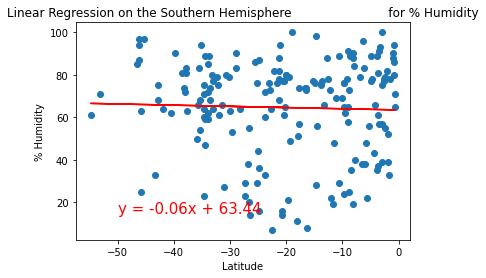

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [96]:
# Linregress Function (r values??)
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress (lats, humidity)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = 0.09x + 67.07
The p-value is: 0.001
The r-value is: 0.139


In [97]:
# Perform Linear Regression on the Percent Cloudiness for the Nothern Hemishpere

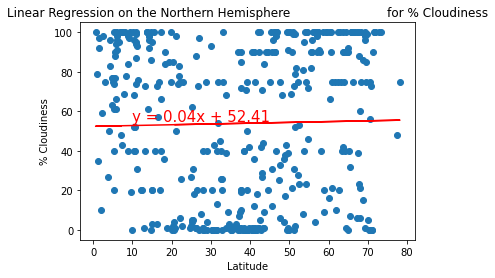

In [98]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

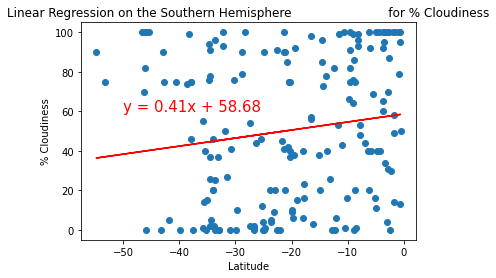

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [100]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

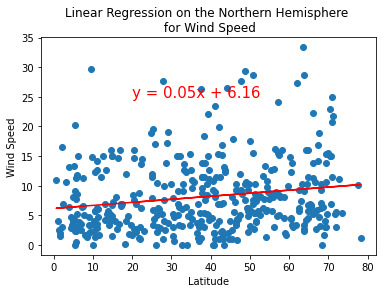

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,25))

In [102]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

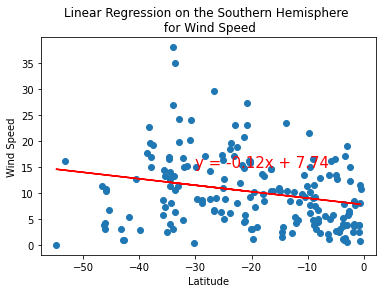

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed','Wind Speed',(-30,15))



In [104]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress (lats, wind speed)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

SyntaxError: invalid syntax (<ipython-input-104-aa6a86afe743>, line 2)